In [14]:
import pandas as pd
import sys
sys.path.append('../')
sys.path.append('../../nfldb')
import tasks.base as base
import tasks.dvoa_crap as dvoa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)


In [77]:
fvdoa = pd.read_csv('../data/2016_17_Regular/qb_fdvoa_17.csv', index_col=['player_name', 'player_id'])
fvdoa.sort_values(by='fantasy_points_count', ascending=False)

,,fantasy_points_count,fdvoa,fdvoa_std
player_name,player_id,,,
Joe Flacco,00-0026158,733,-0.059200,10.178867
Drew Brees,00-0020531,731,0.013813,9.174939
Blake Bortles,00-0031407,724,-0.007332,12.180362
Aaron Rodgers,00-0023459,718,0.087096,11.072688
Carson Wentz,00-0032950,692,-0.082561,7.857765
Matthew Stafford,00-0026498,671,0.002133,9.441065
Kirk Cousins,00-0029604,666,0.046533,10.104162
Jameis Winston,00-0031503,662,0.002638,10.134460
Russell Wilson,00-0029263,661,0.016339,9.037297


C:\Users\xh28\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


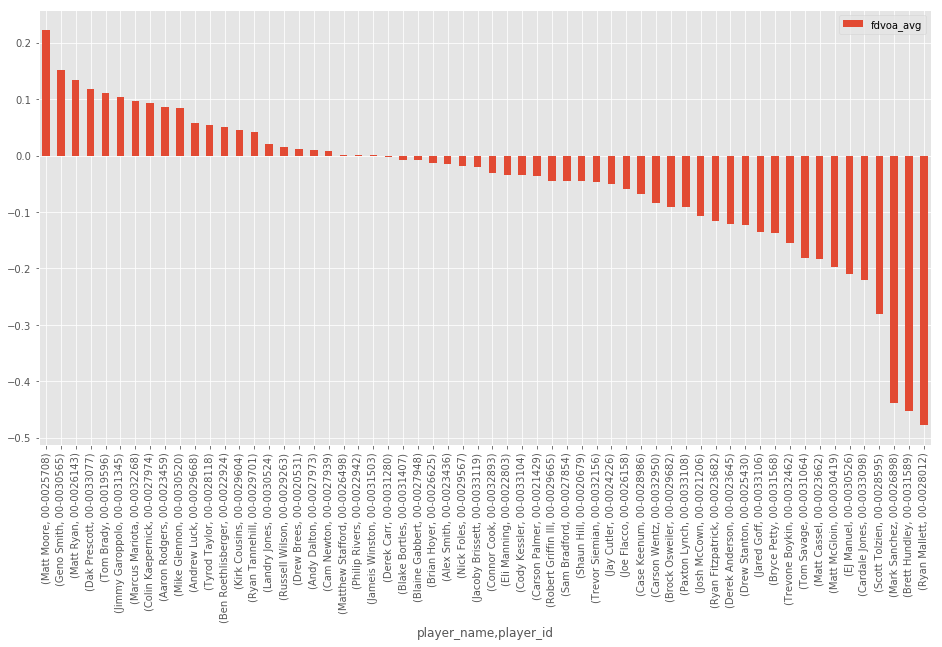

In [20]:

dvoa = pd.read_csv('../data/2016_17_Regular/qb_season_dvoa.csv', index_col=['player_name','player_id'])

dvoa = dvoa.sort_values('fdvoa_avg', ascending=False)[dvoa['fantasy_points_count_x'] > 10]
dvoa
dvoa[['fdvoa_avg']].plot.bar()

In [32]:
df = pd.read_csv('../data/2016_17_Regular/qb_averages_by_player_17.csv',
                 index_col=['player_name', 'player_id', 'down', 'yardline', 'yards_to_go'])

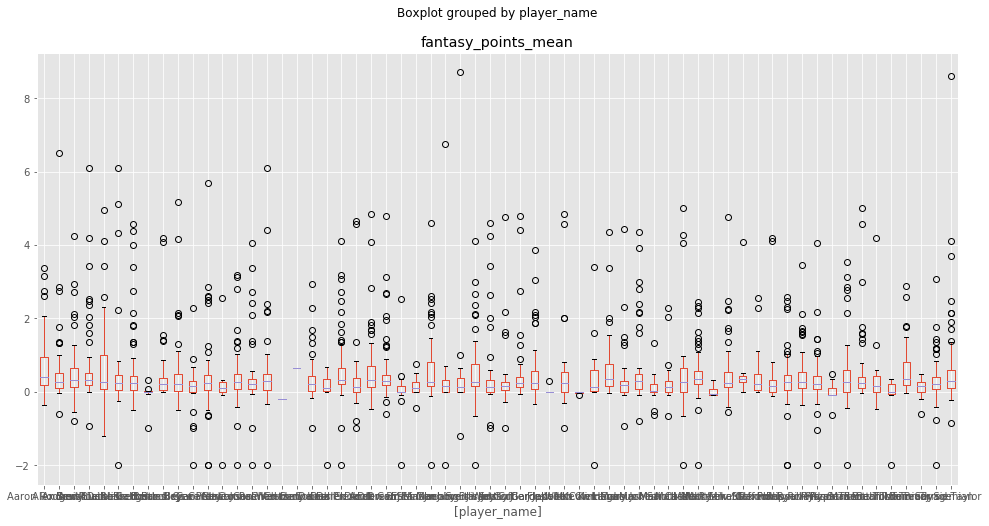

In [73]:
df = df.sort_index(level=['player_name', 'player_id', 'down', 'yardline', 'yards_to_go'])
#df.loc[(slice(None), slice(None), [1], ['midfield']), :].\
#    sort_values('fantasy_points_mean', ascending=False)[['fantasy_points_mean', 'fantasy_points_diff_mean','fantasy_points_count']]

df[['fantasy_points_mean']].boxplot(by=['player_name'])